# Agglomerative/Hierarhical Clustering

#### Aim:

* To group the Below data into a clusters based on the graphs of Dendrogram

#### Steps :

* Importing the data from resource
* Data Cleaning/ Feature Engineering
* Exploratory Data analysis for Statistics and Distribution of data
* Model Selection
* Model Building
* Final End result 

### 1.0 Importing the Data from Resource:

In [1]:
### Librairies
import pandas as pd
import numpy as np

In [2]:
### read the data 
data = pd.read_csv("cluster.csv")
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12316 non-null  float64
 1   Administrative_Duration  12316 non-null  float64
 2   Informational            12316 non-null  float64
 3   Informational_Duration   12316 non-null  float64
 4   ProductRelated           12316 non-null  float64
 5   ProductRelated_Duration  12316 non-null  float64
 6   BounceRates              12316 non-null  float64
 7   ExitRates                12316 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [4]:
### Rows and columns of data
data.shape

(12330, 18)

In [5]:
### Distribution of dataset
data.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12316.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.317798,80.906176,0.503979,34.506387,31.763884,1196.037057,0.022152,0.043003,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.322754,176.860432,1.270701,140.825479,44.490339,1914.372511,0.048427,0.048527,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,8.000000,0.000000,0.000000,18.000000,599.766190,0.003119,0.025124,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.500000,0.000000,0.000000,38.000000,1466.479902,0.016684,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [6]:
### Checking for Null values by Columns
data.isnull().sum()

Administrative             14
Administrative_Duration    14
Informational              14
Informational_Duration     14
ProductRelated             14
ProductRelated_Duration    14
BounceRates                14
ExitRates                  14
PageValues                  0
SpecialDay                  0
Month                       0
OperatingSystems            0
Browser                     0
Region                      0
TrafficType                 0
VisitorType                 0
Weekend                     0
Revenue                     0
dtype: int64

### 2.0 Data Cleaning/Feature Engineering

In [7]:
### Picking the Columns having Nan_Values from the whole dataset
nan_data = data.columns[data.isnull().any()]
nan_data

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates'],
      dtype='object')

In [8]:
### The new data Frame having the columns with Nan Features
nan_df = data[nan_data]

In [9]:
nan_df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05


In [10]:
### We need to check whether al the data are missing completely at a random or not 
def nan_function(data, variable):
    data[variable+"_Null"] = np.where(data[variable].isnull(),1,0)

In [11]:
### Merging New columns with original dataset 
for i in nan_data:
    nan_function(data, i)

In [12]:
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,...,Weekend,Revenue,Administrative_Null,Administrative_Duration_Null,Informational_Null,Informational_Duration_Null,ProductRelated_Null,ProductRelated_Duration_Null,BounceRates_Null,ExitRates_Null
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,...,False,False,0,0,0,0,0,0,0,0
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,...,False,False,0,0,0,0,0,0,0,0
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,...,False,False,0,0,0,0,0,0,0,0
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,...,False,False,0,0,0,0,0,0,0,0
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,...,True,False,0,0,0,0,0,0,0,0


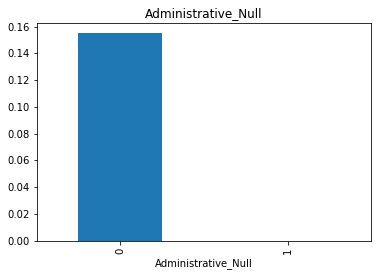

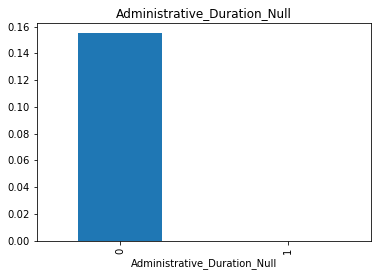

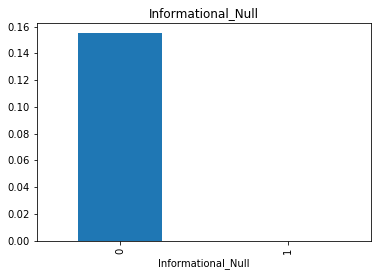

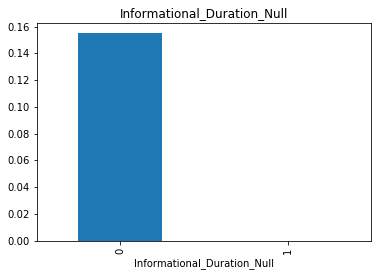

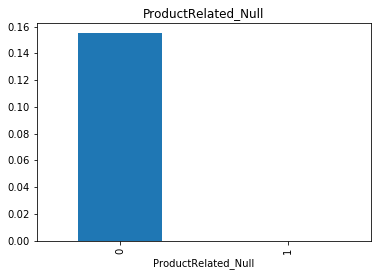

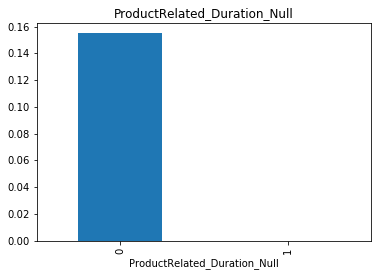

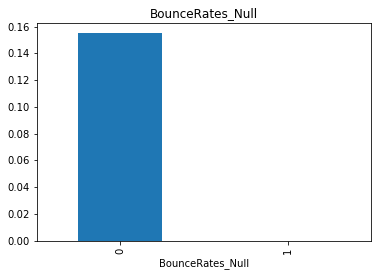

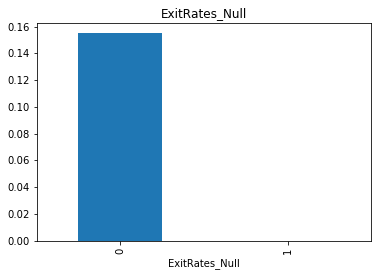

In [13]:
### picking up only the Nan Columns
import matplotlib.pyplot as plt

plot_nan_df = [i for i in data.columns if "_Null" in i]
for variable in plot_nan_df:
    dataset = data.copy()
    dataset.groupby(variable)["Revenue"].mean().plot.bar()
    plt.title(variable)
    plt.show()

From the above picture it is clearly been Noted that the data is Missing Completely at a Random(MCAR):
   * To Solve this type of data Missing we use three types Generally :
       1. Mean/Median/Mode Imputation
       2. Random Sample Imputation
       3. Arbitrary Imputation

In [14]:
### Before getting More lets remove columns we have been created
data.drop(plot_nan_df, axis=1, inplace=True)
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [15]:
data.shape

(12330, 18)

In [16]:
### creating a function for Imputing the nan values with random values
def impute_nan(data, variable, median):
    data[variable+"_Median"] = data[variable].fillna(median)
    data[variable+"_Random"] = data[variable]
    
    ### Get the random values for imputation
    random_values = data[variable].dropna().sample(data[variable].isnull().sum(), random_state=0)
    
    ### Change the index to Merge the dataset
    random_values.index = data[data[variable].isnull()].index
    data.loc[data[variable].isnull(), variable+'_random'] = random_values

In [17]:
### Find the Median
median_nan_values = []
for i in nan_data:
    median = data[i].median()
    median_nan_values.append(median)
median_nan_values

[1.0, 8.0, 0.0, 0.0, 18.0, 599.76619045, 0.0031194120000000002, 0.025124489]

In [18]:
### Impute the nan_values
for i in range(len(median_nan_values)):
    impute_nan(data, nan_data[i], median_nan_values[i])

In [19]:
pd.set_option('display.max_columns', None)
data.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Administrative_Median,Administrative_Random,Administrative_random,Administrative_Duration_Median,Administrative_Duration_Random,Administrative_Duration_random,Informational_Median,Informational_Random,Informational_random,Informational_Duration_Median,Informational_Duration_Random,Informational_Duration_random,ProductRelated_Median,ProductRelated_Random,ProductRelated_random,ProductRelated_Duration_Median,ProductRelated_Duration_Random,ProductRelated_Duration_random,BounceRates_Median,BounceRates_Random,BounceRates_random,ExitRates_Median,ExitRates_Random,ExitRates_random
0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,1.0,1.0,NaN,0.000000,0.000000,NaN,0.20,0.20,NaN,0.20,0.20,NaN
1,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,2.0,2.0,NaN,64.000000,64.000000,NaN,0.00,0.00,NaN,0.10,0.10,NaN
2,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0.0,0.0,NaN,-1.0,-1.0,NaN,0.0,0.0,NaN,-1.0,-1.0,NaN,1.0,1.0,NaN,-1.000000,-1.000000,NaN,0.20,0.20,NaN,0.20,0.20,NaN
3,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,2.0,2.0,NaN,2.666667,2.666667,NaN,0.05,0.05,NaN,0.14,0.14,NaN
4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,0.0,0.0,NaN,10.0,10.0,NaN,627.500000,627.500000,NaN,0.02,0.02,NaN,0.05,0.05,NaN


In [26]:
### Label Encode the Categorical Values for clustering purposes
categorical_data = [feature for feature in data.columns if data[feature].dtypes=='O' or data[feature].dtypes=='bool']
encoded_categorical_data = pd.DataFrame(data[categorical_data])
### import the Encoding Libraries
from sklearn.preprocessing import LabelEncoder
encoded_categorical_data=encoded_categorical_data.apply(LabelEncoder().fit_transform)

In [27]:
data.drop(categorical_data, axis=1, inplace=True)
data = pd.concat([data, encoded_categorical_data], axis=1)
data.head()

,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Administrative,Administrative_random,Administrative_Duration,Administrative_Duration_random,Informational_Median,Informational_random,Informational_Duration_Median,Informational_Duration_random,ProductRelated,ProductRelated_random,ProductRelated_Duration,ProductRelated_Duration_random,BounceRates,BounceRates_random,ExitRates,ExitRates_random,Month,VisitorType,Weekend,Revenue
0,0.0,0.0,1,1,1,1,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN,0.000000,NaN,0.20,NaN,0.20,NaN,2,2,0,0
1,0.0,0.0,2,2,1,2,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,2.0,NaN,64.000000,NaN,0.00,NaN,0.10,NaN,2,2,0,0
2,0.0,0.0,4,1,9,3,0.0,NaN,-1.0,NaN,0.0,NaN,-1.0,NaN,1.0,NaN,-1.000000,NaN,0.20,NaN,0.20,NaN,2,2,0,0
3,0.0,0.0,3,2,2,4,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,2.0,NaN,2.666667,NaN,0.05,NaN,0.14,NaN,2,2,0,0
4,0.0,0.0,3,3,1,4,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,10.0,NaN,627.500000,NaN,0.02,NaN,0.05,NaN,2,2,1,0


In [30]:
### Since its been giving an error as still Nan Values in the Table im going to choose only the Required Column

unwanted_columns = [feature for feature in data.columns if "_random" in feature]
data.drop(unwanted_columns, axis=1, inplace=True)
data.head()

,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Administrative,Administrative_Duration,Informational_Median,Informational_Duration_Median,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,Month,VisitorType,Weekend,Revenue
0,0.0,0.0,1,1,1,1,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,2,2,0,0
1,0.0,0.0,2,2,1,2,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,2,2,0,0
2,0.0,0.0,4,1,9,3,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,2,2,0,0
3,0.0,0.0,3,2,2,4,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,2,2,0,0
4,0.0,0.0,3,3,1,4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,2,2,1,0


### 3.0 Exploratory Data analysis for Statistics and Distribution of data :

In [20]:
### Plotting Libraires
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

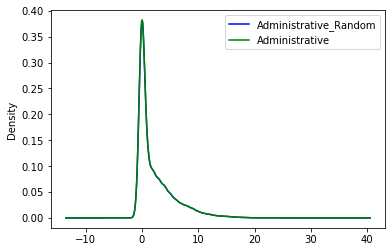

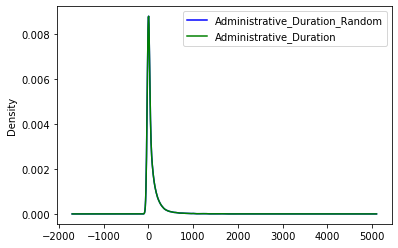

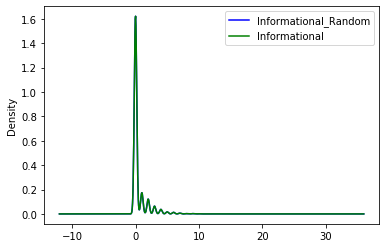

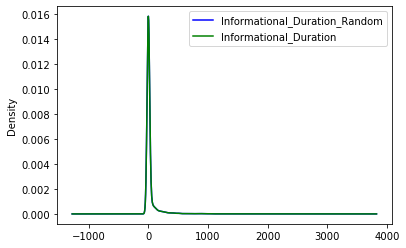

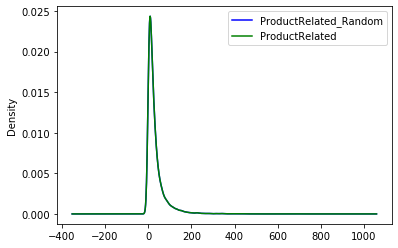

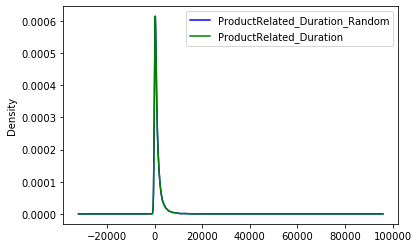

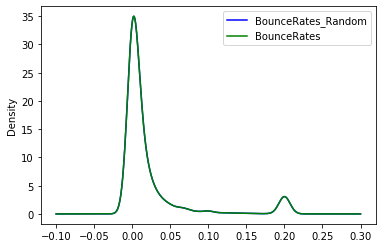

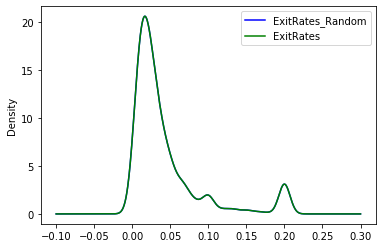

In [21]:
### Lets Compare which Imputation has better result whether Median/ Random_sample
random_imputation = [i for i in data.columns if "_Random" in i]
median_imputation = [i for i in data.columns if "_Median" in i]
for i in range(len(random_imputation)):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    data[random_imputation[i]].plot(kind='kde', ax=ax, color='blue')
    #[median_imputation[i]].plot(kind='kde', ax=ax, color='red')
    data[nan_data[i]].plot(kind='kde', ax=ax, color='green')
    lines, labels = ax.get_legend_handles_labels()
    ax.legend(lines, labels, loc='best')

* From the above Picture is Clearly Demontstrates that there is no distortion in original data by Both Median and random_sample Imputation
* Due to less number of Missing Values its good to go ahead with an Median Because random_sample while the coding more to do in the future stage its not been recommended

In [22]:
### Remove the columns with random and missing data
data.drop(nan_data, axis=1, inplace=True)
data.drop(random_imputation, axis=1, inplace=True)
data.head()

,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Administrative_Median,Administrative_random,Administrative_Duration_Median,Administrative_Duration_random,Informational_Median,Informational_random,Informational_Duration_Median,Informational_Duration_random,ProductRelated_Median,ProductRelated_random,ProductRelated_Duration_Median,ProductRelated_Duration_random,BounceRates_Median,BounceRates_random,ExitRates_Median,ExitRates_random
0,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN,0.000000,NaN,0.20,NaN,0.20,NaN
1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,2.0,NaN,64.000000,NaN,0.00,NaN,0.10,NaN
2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0.0,NaN,-1.0,NaN,0.0,NaN,-1.0,NaN,1.0,NaN,-1.000000,NaN,0.20,NaN,0.20,NaN
3,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,2.0,NaN,2.666667,NaN,0.05,NaN,0.14,NaN
4,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,10.0,NaN,627.500000,NaN,0.02,NaN,0.05,NaN


In [23]:
### Lets rename the columns as of older Format
data.rename(columns={"Administrative_Median" : "Administrative",
                     "Administrative_Duration_Median" : "Administrative_Duration",
                     "Informational_Median" : "Informational_Median",
                     "Informational_Duration_Median" : "Informational_Duration_Median",
                     "ProductRelated_Median" : "ProductRelated",
                     "ProductRelated_Duration_Median" : "ProductRelated_Duration",
                     "BounceRates_Median" : "BounceRates",
                     "ExitRates_Median" : "ExitRates"}, inplace=True)
data.head()

,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue,Administrative,Administrative_random,Administrative_Duration,Administrative_Duration_random,Informational_Median,Informational_random,Informational_Duration_Median,Informational_Duration_random,ProductRelated,ProductRelated_random,ProductRelated_Duration,ProductRelated_Duration_random,BounceRates,BounceRates_random,ExitRates,ExitRates_random
0,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,1.0,NaN,0.000000,NaN,0.20,NaN,0.20,NaN
1,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,2.0,NaN,64.000000,NaN,0.00,NaN,0.10,NaN
2,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False,0.0,NaN,-1.0,NaN,0.0,NaN,-1.0,NaN,1.0,NaN,-1.000000,NaN,0.20,NaN,0.20,NaN
3,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,2.0,NaN,2.666667,NaN,0.05,NaN,0.14,NaN
4,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,10.0,NaN,627.500000,NaN,0.02,NaN,0.05,NaN


### 4.0 Model Selection :

##### K Means Clustering :

The first step of this algorithm is creating, among our unlabeled observations, c new observations, randomly located, called ‘centroids’. The number of centroids will be representative of the number of output classes (which, remember, we do not know). Now, an iterative process will start, made of two steps:
First, for each centroid, the algorithm finds the nearest points (in terms of distance that is usually computed as Euclidean distance) to that centroid, and assigns them to its category;
Second, for each category (represented by one centroid), the algorithm computes the average of all the points which has been attributed to that class. The output of this computation will be the new centroid for that class.
Every time the process is reiterated, some observations, initially classified together with one centroid, might be redirected to another one. Furthermore, after several reiterations, the change in centroids’ location should be less and less important since the initial random centroids are converging to the real ones. This process ends when there is no more change in centroids’ position.
Image for post
Now, how can we decide the number of centroids?
There are many methods that could be employed for this task. However, in this article, I’m going to explain and use the so-called ‘Elbow method’. The idea is that what we would like to observe within our clusters is a low level of variation, which is measured with the within-cluster sum of squares (WCSS):
Image for post
And it is intuitive to understand that, the higher the number of centroids, the lower the WCSS. In particular, if we have as many centroids as the number of our observations, each WCSS will be equal to zero. However, if we remember the law of parsimony, we know that setting the highest number possible of centroids would be inconsistent.
The idea is picking that number of centroids after which the reduction in WCSS is irrelevant. The relation I’ve just described can be represented with the following graph:
Image for post
The idea is that, if the plot is an arm, the elbow of the arm is the optimal number of centroids.

#### Hierarchical Clustering :

This algorithm can use two different techniques:
* Agglomerative
* Divisive

Those latter are based on the same ground idea, yet work in the opposite way: being K the number of clusters (which can be set exactly like in K-means) and n the number of data points, with n>K, agglomerative HC starts from n clusters, then aggregates data until it obtains K clusters; divisive HC, on the other hand, starts from just one cluster and then splits it depending, again, on similarities, until it obtains K clusters. Note that, when I say similarities, I’m referring to the distance among data points, which can be computed in different ways (I will dwell on this later on).
Let’s visualize both the agglomerative and divisive techniques:
Image for post
Agglomerative HC
Image for post
Divisive HC
As anticipated, the key element of discrimination here is similarity among data points. In mathematical terms, similarity mainly refers to distance, and it can be computed with different approaches. Here, I will propose three of them:
Min: it states that, given two clusters C1 and C2, the similarity between them is equal to the minimum of similarity (translated: distance) between point a and b, such that a belongs to C1 and b belongs to C2.
Image for post
Max: it states that, given two clusters C1 and C2, the similarity between them is equal to the maximum of similarity between point a and b, such that a belongs to C1 and b belongs to C2.
Image for post
Average: it takes all the pairs of points, compute their similarities and then calculate the average of the similarities. That latter is the similarity between the clusters C1 and C2.
Image for post
So, to recap, both the algorithms look for similarities among data and both use the same approaches to decide the number of clusters. Choosing the one rather than the other really depends on the kind of task you’re facing.

Since the Model has more feature we need to specify the Centroides and difficult to go ahead so i go with Agglomerative Clustering where the distance is used for making Clusters

### 5.0 Model Building

In [44]:
data.head()

,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Administrative,Administrative_Duration,Informational_Median,Informational_Duration_Median,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,Month,VisitorType,Weekend,Revenue
0,0.0,0.0,1,1,1,1,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,2,2,0,0
1,0.0,0.0,2,2,1,2,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,2,2,0,0
2,0.0,0.0,4,1,9,3,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,2,2,0,0
3,0.0,0.0,3,2,2,4,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,2,2,0,0
4,0.0,0.0,3,3,1,4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,2,2,1,0


In [35]:
### Importing the Libraires to draw a Dendrogram

from scipy.cluster.hierarchy import dendrogram,linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import cdist

from pylab import rcParams

from sklearn.cluster import AgglomerativeClustering

plt.figure(figsize=(40,40))

plt.style.use("seaborn-whitegrid")

<Figure size 2880x2880 with 0 Axes>

In [36]:
### The Linkage function determines the distance to form a cluster in a data
z = linkage(data,method='ward') 

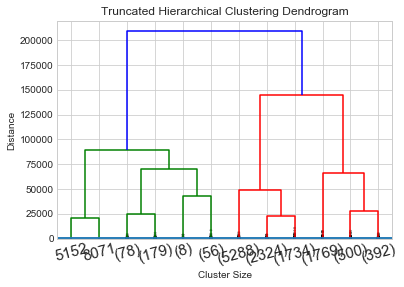

In [37]:
### Generating the Dendrogram Tree

dendrogram(z,truncate_mode='lastp',p=12,leaf_rotation=15,leaf_font_size=15,show_contracted=True)  
plt.title("Truncated Hierarchical Clustering Dendrogram")
plt.xlabel("Cluster Size")
plt.ylabel("Distance")

plt.axhline(y=500)
plt.axhline(y=150)

plt.show()

In [39]:
### Generating the Hierarchical Clustering
k=2
Hclustering=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
Hclustering.fit(data)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=2)

In [43]:
### lets look at the Classes that are Classified using Hierarchical Clustering
labels=Hclustering.labels_
np.unique(labels)

array([0, 1], dtype=int32)

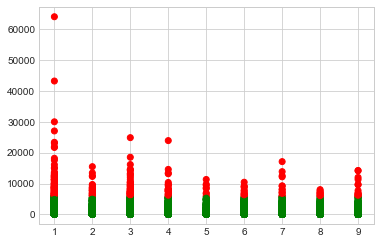

In [50]:
### Lets look how the data has been classified based on clustering
colormap=np.array(["Green", "Red"])
plt.scatter(data.Region, data.ProductRelated_Duration, c=colormap[labels])

Awesome! We can clearly visualize the two clusters here. This is how we can implement hierarchical clustering using scikit-learn and scipy.

### 5.0 Final End result :

In [51]:
data["Cluster_labels"] = labels

In [52]:
data.head()

,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Administrative,Administrative_Duration,Informational_Median,Informational_Duration_Median,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,Month,VisitorType,Weekend,Revenue,Cluster_labels
0,0.0,0.0,1,1,1,1,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,2,2,0,0,0
1,0.0,0.0,2,2,1,2,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,2,2,0,0,0
2,0.0,0.0,4,1,9,3,0.0,-1.0,0.0,-1.0,1.0,-1.000000,0.20,0.20,2,2,0,0,0
3,0.0,0.0,3,2,2,4,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,2,2,0,0,0
4,0.0,0.0,3,3,1,4,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,2,2,1,0,0


The Objective of the Project has been accomplished and the data has been Classified into two Clusters